In [141]:
# for manipulations
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for interactivity
from ipywidgets import interact

In [142]:
# lets read the dataset
data = pd.read_csv('data.csv')

In [143]:
# lets check the shape of dataset
print("shape of data row,column",data.shape)

shape of data row,column (2200, 8)


In [144]:
# lets check the head of data set
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [145]:
# lets check if there is any missing values present in the dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [146]:
# fill-na function is used to replace thses missing values with statistical values such as mean, median ,mode
# na means Not Available
# Pandas have functions like fill-na, drop-na, to treat missing values
# when to use median mode or mean in first point
# median - 
# mode - categorical values
# mean - numerical values

In [147]:
# lets check the crops present in our database
data['label'].value_counts()

maize          100
coconut        100
apple          100
coffee         100
lentil         100
pomegranate    100
kidneybeans    100
cotton         100
chickpea       100
mango          100
mungbean       100
blackgram      100
banana         100
grapes         100
papaya         100
jute           100
orange         100
rice           100
mothbeans      100
pigeonpeas     100
watermelon     100
muskmelon      100
Name: label, dtype: int64

In [148]:
# lets check the summary for all crops
print("Average Ratio of Nitrogen in the soil : ",data['N'].mean())

Average Ratio of Nitrogen in the soil :  50.551818181818184


In [149]:
# lets check the summary statistics for each crop

@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label']==crops]
    print("Stats for Nitrogen")
    print("Min Nitrogen req : ",x['N'].min())
    print("Max Nitrogen req : ",x['N'].max())
    print("Avg Nitrogen req : ",x['N'].mean())
    print("Stats for Phosphorus")
    print("Min Phosphorus req : ",x['P'].min())
    print("Max Phosphorus req : ",x['P'].max())
    print("Avg Phosphorus req : ",x['P'].mean())
    print("Stats for Pottasium")
    print("Min Pottasium req : ",x['K'].min())
    print("Max Pottasium req : ",x['K'].max())
    print("Avg Pottasium req : ",x['K'].mean())
    print("Stats for Temprature")
    print("Min Temprature req : ",x['temperature'].min())
    print("Max Temprature req : ",x['temperature'].max())
    print("Avg Temprature req : ",x['temperature'].mean())

interactive(children=(Dropdown(description='crops', options=('maize', 'coconut', 'apple', 'coffee', 'lentil', …

In [150]:
# lets make functions more intutive

@interact
def compare(conditions=['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average",conditions,'\n')
    print(data[data[conditions]>data[conditions].mean()]['label'].unique())
    print("Crops which require lesser than average",conditions,'\n')
    print(data[data[conditions]<=data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

D:\SoftwareFiles\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


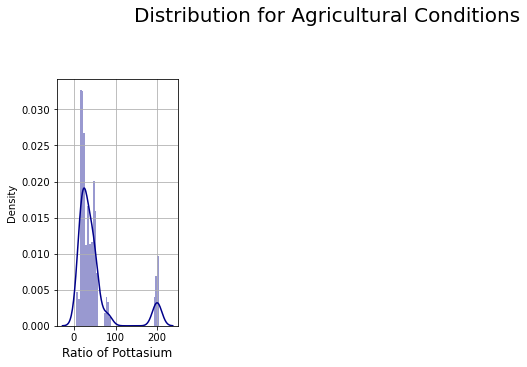

In [151]:
# to check distribution using seaborn

plt.subplot(2,4,1)
sns.distplot(data['K'],color='darkblue')
plt.xlabel('Ratio of Pottasium',fontsize=12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions',fontsize=20)
plt.show()


In [152]:
# some intresting facts thiss 200 comes from distribution chart
print("Crops requires very high ratio of Pottasium in Soil :",data[data['K']>200]['label'].unique())

Crops requires very high ratio of Pottasium in Soil : ['grapes' 'apple']


In [153]:
# diffrentiating crops on seasons basis
print("Summer Crops")
print(data[(data['temperature']>30)&(data['humidity']>50)]['label'].unique())
print("Winter Crops")
print(data[(data['temperature']<20)&(data['humidity']>30)]['label'].unique())
print("Rainy Crops")
print(data[(data['rainfall']>200)&(data['humidity']>50)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
Rainy Crops
['rice' 'papaya' 'coconut']


In [154]:
from sklearn.cluster import KMeans

#removing the labels column in unsupervised we didnt need labels
x=data.drop(['label'],axis=1)

#selecting all the values of the data 
x=x.values

#checking the shape
print(x.shape)

(2200, 7)


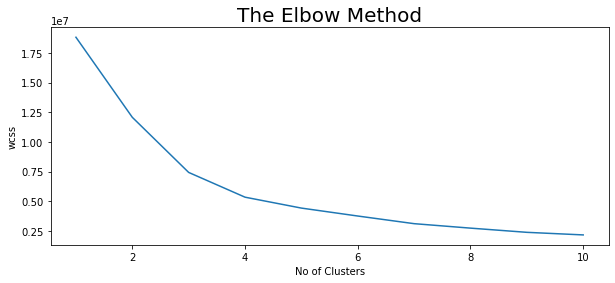

In [155]:
# lets check optimum numbers of clusters in the datasets using elbow chart

plt.rcParams['figure.figsize']=(10,4)

wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10 , random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)
    
#lets plot the results
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('No of Clusters')
plt.ylabel('wcss')
plt.show()
 
#here we take 4 instead of 3 as clusters 

In [156]:
# lets implement the KMeans algorithm to perform Clustering Analysis
km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10 , random_state = 0)
y_means = km.fit_predict(x)

#lets find out the results
a = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means,a],axis=1)
z = z.rename(columns={0:'cluster'})

#lets check the clusters of each crop
print("Results")
print("Crops in 1st Cluster",z[z['cluster']==0]['label'].unique())
print("Crops in 2nd Cluster",z[z['cluster']==1]['label'].unique())
print("Crops in 3rd Cluster",z[z['cluster']==2]['label'].unique())
print("Crops in 4th Cluster",z[z['cluster']==3]['label'].unique())

Results
Crops in 1st Cluster ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Crops in 2nd Cluster ['grapes' 'apple']
Crops in 3rd Cluster ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
Crops in 4th Cluster ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']


In [157]:
# we use evaluation matrix to find out accuracy and performance of our model
# we use logistic regression
# lets split the dataset for predictive modelling

y=data['label']
x=data.drop(['label'],axis=1)

print("shape of x:",x.shape)
print("shape of y:",y.shape)

shape of x: (2200, 7)
shape of y: (2200,)


In [158]:
# lets create training set and testing set for validation of results
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

print("the shape of x_train:",x_train.shape)
print("the shape of x_test:",x_test.shape)
print("the shape of y_train:",y_train.shape)
print("the shape of y_test:",y_test.shape)

the shape of x_train: (1760, 7)
the shape of x_test: (440, 7)
the shape of y_train: (1760,)
the shape of y_test: (440,)


In [159]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(solver='liblinear',random_state=0)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

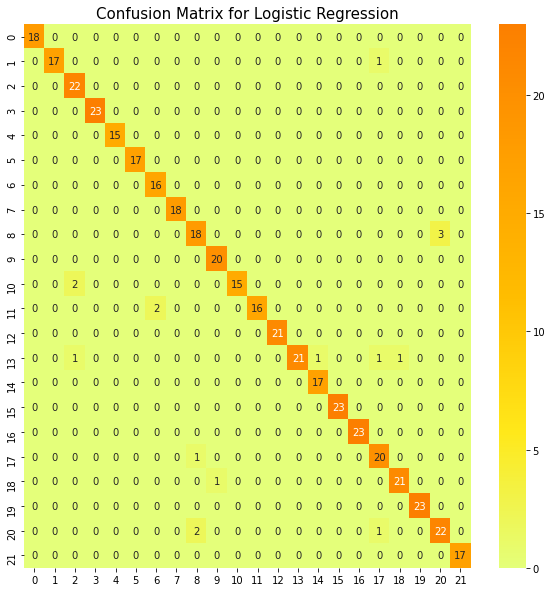

In [160]:
# lets evaluate performance of model
from sklearn.metrics import confusion_matrix

# lets print the confusion matrix first
plt.rcParams['figure.figsize']=(10,10)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Wistia')
plt.title('Confusion Matrix for Logistic Regression',fontsize=15)
plt.show()

In [161]:
#lets print the classification report
from sklearn.metrics import classification_report
cr=classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      0.94      0.97        18
   blackgram       0.88      1.00      0.94        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.86      0.86      0.86        21
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      0.88      0.94        17
       maize       1.00      0.89      0.94        18
       mango       1.00      1.00      1.00        21
   mothbeans       1.00      0.84      0.91        25
    mungbean       0.94      1.00      0.97        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       0.87    

In [162]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [163]:
prediction=model.predict((np.array([[90,40,40,20,80,7,200]])))
print(prediction)

['rice']
